In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline




In [2]:
path = '/content/drive/MyDrive/Datasets /term-deposit-marketing-2020.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
'The dataset has {row} rows and {column} columns'.format(row=df.shape[0], column=df.shape[1])

'The dataset has 40000 rows and 14 columns'

In [5]:
df.isnull().any()


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

"Yes" and "No" in the target variable was changed to 0 for "No" and 1 for "Yes". This is to make modeling easier. One hot encoding will be used on the categorical and binary variables during preprocessing.

In [8]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

There appears to be high rejection rates for a term deposits. Knowing why this is so could be valuable in knowing which people would be more likely to open a term deposit.

In [9]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1


In [10]:
df['y'].astype(int)


0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

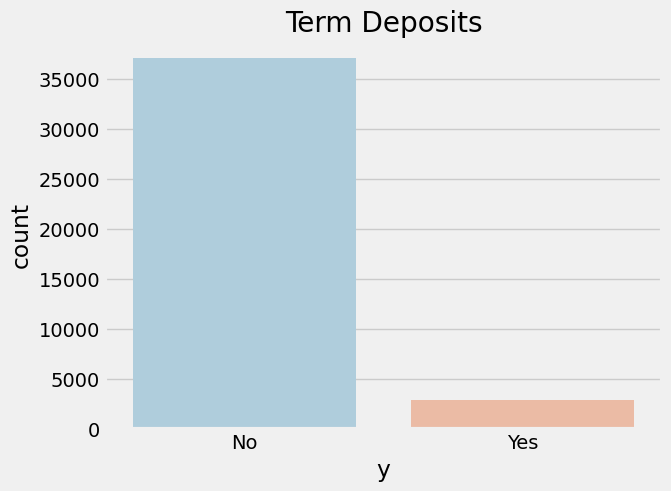

In [11]:
ax = sns.countplot(x='y', data=df, palette='RdBu_r')
ax.set_title('Term Deposits')
ax.set_xticklabels(['No', 'Yes'])


plt.show()


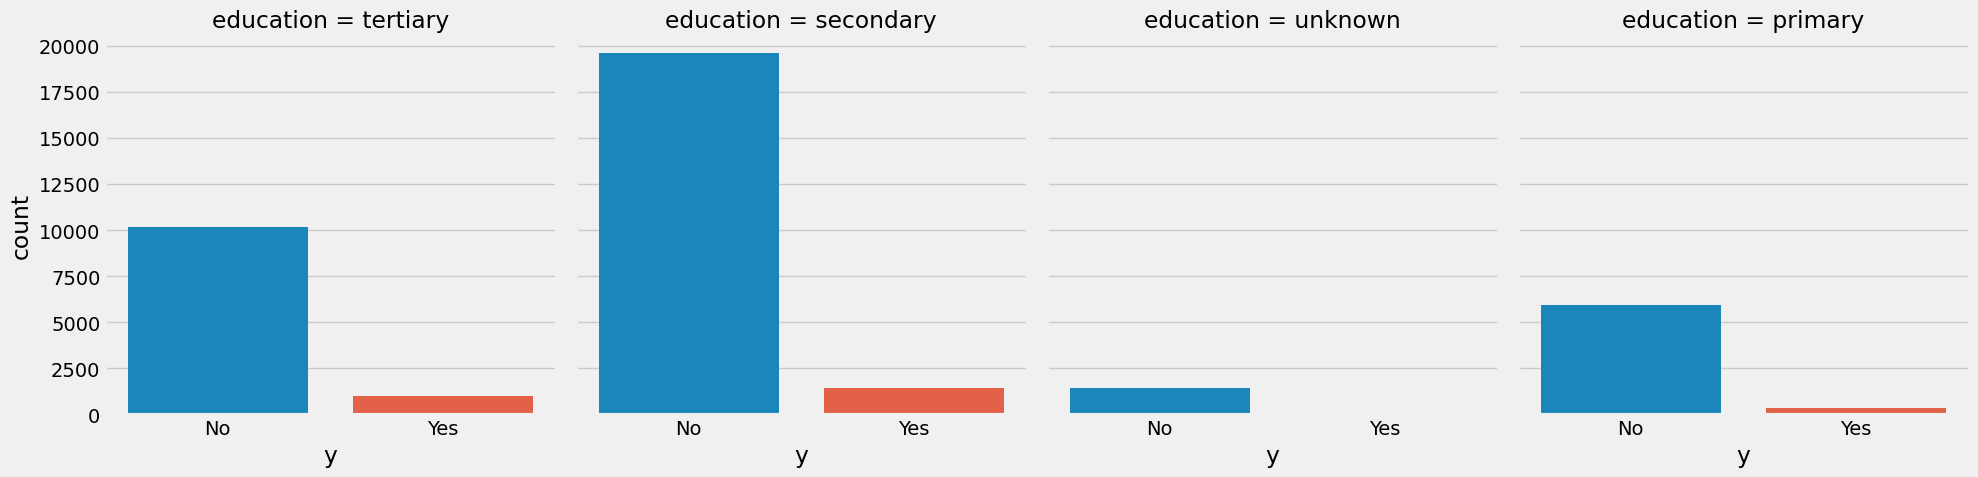

In [12]:
ax = sns.catplot(x='y', col='education', data=df, kind='count')
ax.set_xticklabels(['No', 'Yes'])
plt.show()



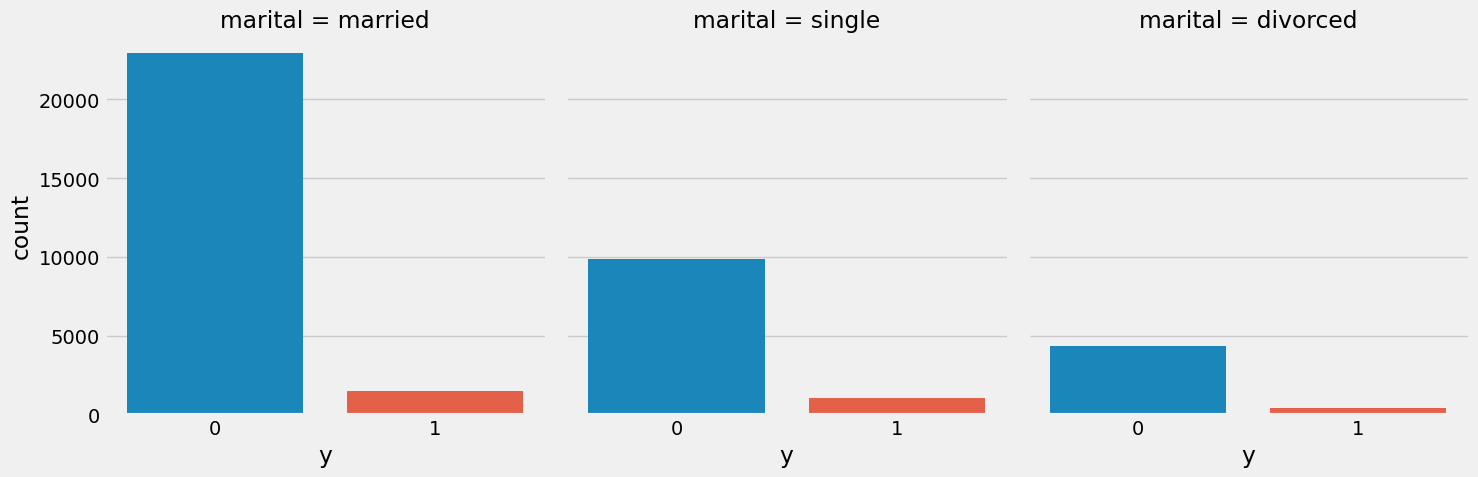

In [13]:
sns.catplot(x='y', col='marital', data=df, kind='count')
plt.show()


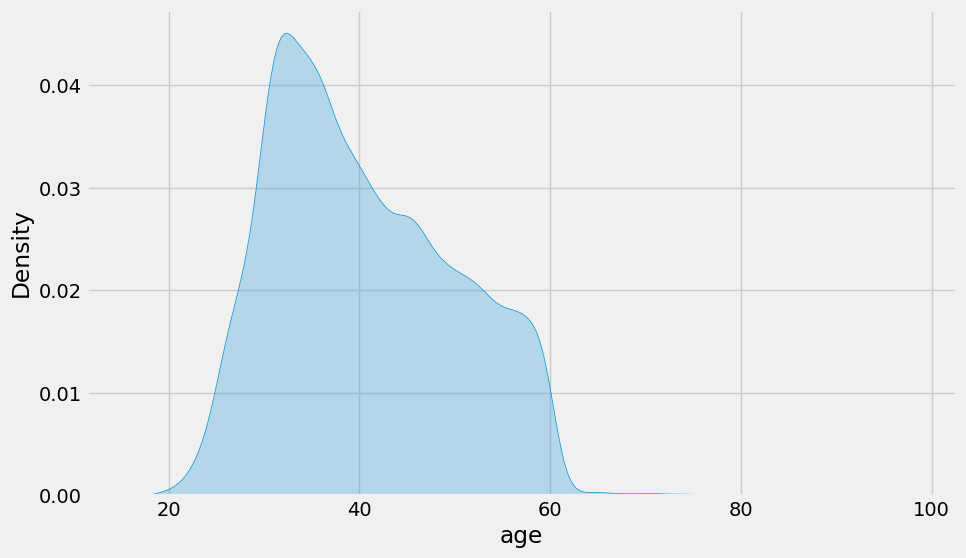

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], fill=True)
plt.show()





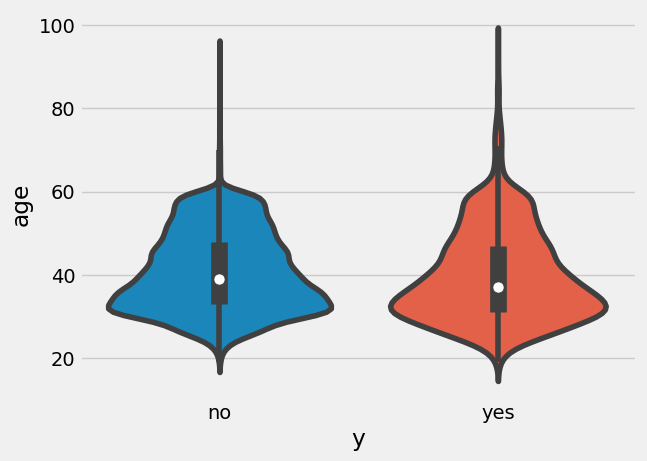

In [15]:
ax = sns.violinplot(x='y', y='age', data=df)
ax.set_xticklabels(['no', 'yes'])
plt.show()



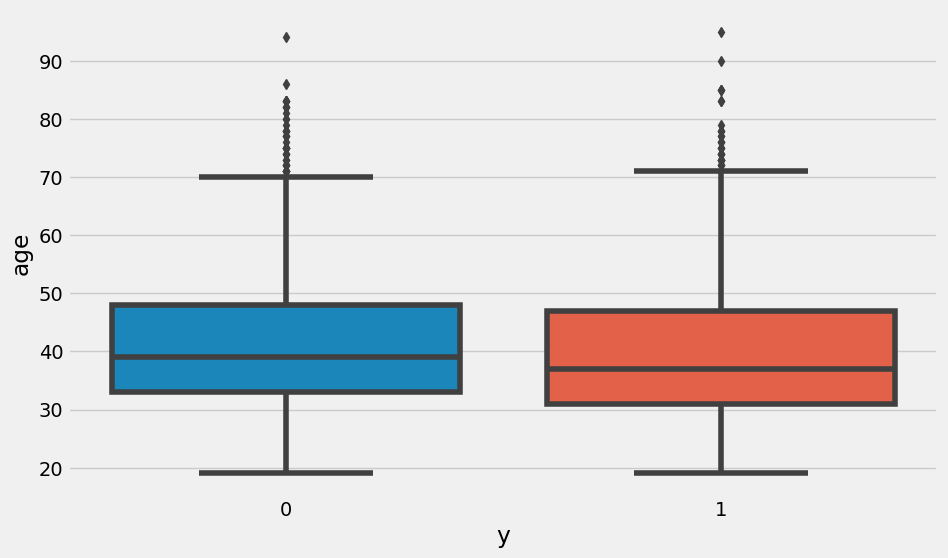

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.show()




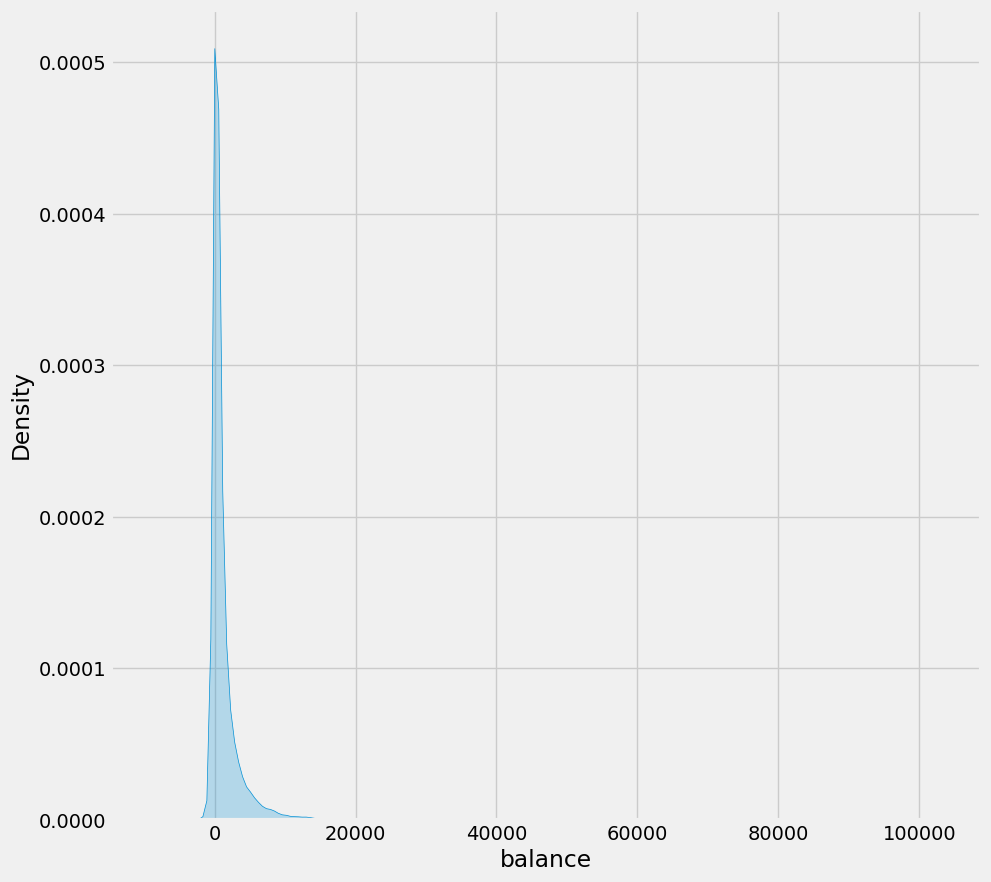

In [17]:
plt.figure(figsize=(10, 10))
sns.kdeplot(df['balance'], fill=True)
plt.show()







In [18]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [19]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
df.loc[df['contact'] == 'no', 'contact'] = 0
df.loc[df['contact'] == 'yes', 'contact'] = 1

In [22]:
df.loc[df['default'] == 'no', 'default'] = 0
df.loc[df['default'] == 'yes', 'default'] = 1

In [23]:
df.loc[df['housing'] == 'no', 'housing'] = 0
df.loc[df['housing'] == 'yes', 'housing'] = 1

In [24]:
df.loc[df['loan'] == 'no', 'loan'] = 0
df.loc[df['loan'] == 'yes', 'loan'] = 1

In [25]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


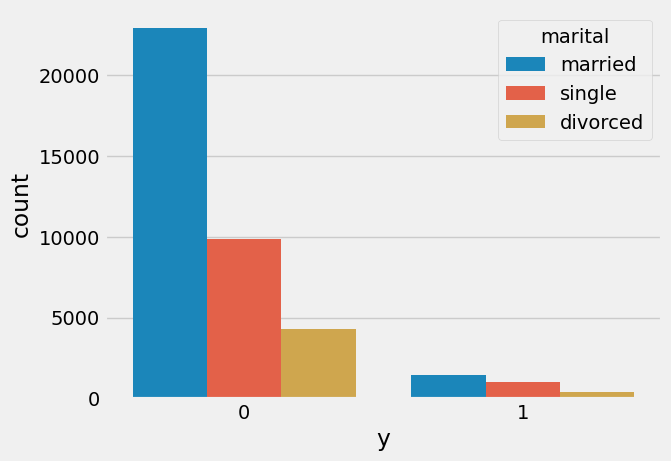

In [26]:
sns.countplot(x='y', hue='marital', data=df)
plt.show()


In [27]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [29]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,0


In [30]:
df.drop(columns=['day', 'month', 'duration'], inplace=True)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,1,0


In [32]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact'])

In [33]:
df.head()

,age,default,balance,housing,loan,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [34]:
X = df.drop(columns=['y'])
y = df['y']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 28)
(8000, 28)
(32000,)
(8000,)


In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier(n_estimators=100, random_state=50)
clf.fit(X_train, y_train_encoded)
clf.score(X_test, y_test_encoded)


0.919

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score


In [43]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(clf, X_train, y_train_encoded, scoring=scoring, cv=5)



In [44]:
sorted(scores.keys())
scores = pd.DataFrame(scores)
scores



,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,7.334876,0.355870,0.920469,0.205128,0.034557,0.059150
1,6.452151,0.843452,0.922031,0.280488,0.049676,0.084404
2,6.234434,0.161204,0.920781,0.210526,0.034557,0.059369
3,2.609096,0.161184,0.922188,0.270270,0.043103,0.074349
4,2.575662,0.199333,0.922813,0.307692,0.051724,0.088561


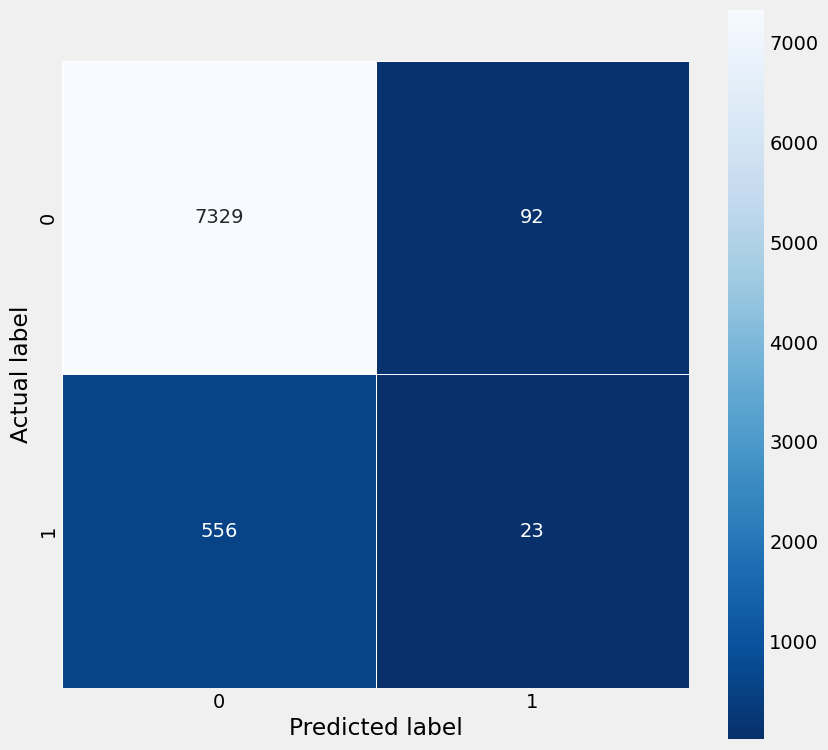

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_encoded, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test_encoded, clf.predict(X_test)), fmt='d', annot=True, linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()


In [46]:
rf_imp = clf.feature_importances_
feature_imp = pd.DataFrame({'feature': X.columns, 'importance': rf_imp})
feature_imp = feature_imp.sort_values(by=['importance'], ascending=False)


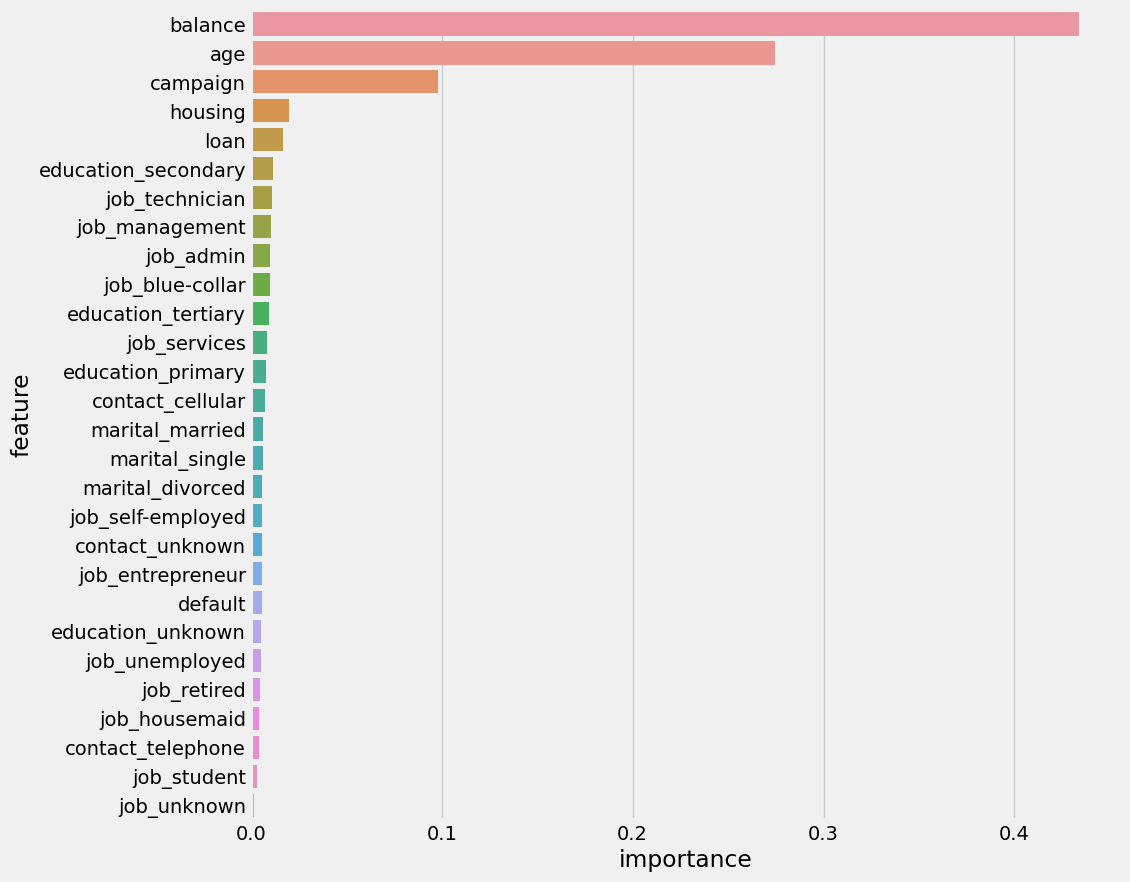

In [47]:

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_imp)
plt.show()



# Lift Analysis
Lift analysis is a technique classification tasks to understand the performance of a model. Since there are high rejection rates for accepting a term deposit, lift analysis could be particularly useful in scenarios where the positive class (the people who are buying term deposits) is relatively rare. It helps us evaluate how much better a model is at targeting the buyers compared to random selection.

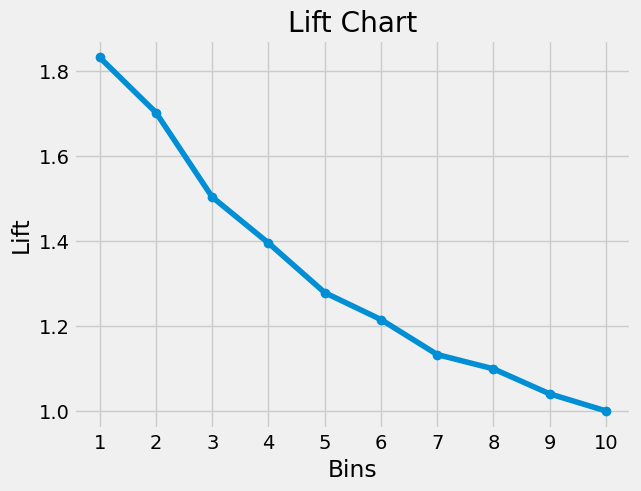

In [48]:
import numpy as np
#get predicted probabilities and true labels from test set
predictions = clf.predict_proba(X_test)[:, 1]  # Positive class probabilities
true_labels = y_test  # Actual true labels

# Combine predictions and true labels for sorting
data = np.column_stack((predictions, true_labels))
data = data[data[:, 0].argsort()[::-1]]  # Sort by predicted probabilities

num_bins = 10  # Number of bins

bin_size = len(data) // num_bins
lift_values = []

for i in range(1, num_bins + 1):
    bin_data = data[:i * bin_size]
    response_rate = np.sum(bin_data[:, 1]) / len(bin_data)
    random_response = np.sum(true_labels) / len(true_labels)
    lift = response_rate / random_response
    lift_values.append(lift)

# Plot lift chart
plt.plot(range(1, num_bins + 1), lift_values, marker='o')
plt.xlabel("Bins")
plt.xticks(range(1, num_bins + 1))
plt.ylabel("Lift")
plt.title("Lift Chart")
plt.show()
